<a href="https://colab.research.google.com/github/St-Jester/neural-generated-content-detection/blob/master/analytics/Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import os
import pandas as pd
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
def get_filename(full_path):
  filename_full = os.path.basename(os.path.normpath(full_path))
  s = filename_full.split(".")[:-2]
  listToStr = '.'.join([str(elem) for elem in s])
  return listToStr

def get_index(filename, source_data):
  indexes = source_data['filename'].str.find(filename)
  index = indexes.sort_values(ascending=False).head(1).index
  return index

In [0]:
# os.path.basename(os.path.normpath(faces_data['filename'][0]))
# faces_data['filename'][0]
# os.path.basename(os.path.normpath(image_data['filename'][0]))
# faces_data['filename'][0]

In [0]:
faces_csv_path = '/content/drive/My Drive/FakeImageDetector/dataset/dataset_faces_new.csv'
faces_data = pd.read_csv(faces_csv_path)
image_data = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/dataset_tvt_copy.csv')
faces_index = 0
faces_data['filename'][faces_index]


'/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/DeepFakeDetection/c23/faces/14_21__exit_phone_room__IRKML4J0_14.bmp.jpg'

In [0]:
image_data = image_data.drop(['Unnamed: 0'], axis=1)
image_data

,filename,imgname,fake_real_name,target_source,age,age_cat,gender,gender10,gender_age_cat,train
0,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image6.jpg,real_images,21,32.637210,age_30_40,0.061687,0,0_age_30_40,train
1,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image7.jpg,real_images,21,31.867521,age_30_40,0.063749,0,0_age_30_40,train
2,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image8.jpg,real_images,21,34.179979,age_30_40,0.032942,0,0_age_30_40,train
3,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image9.jpg,real_images,21,33.717182,age_30_40,0.026315,0,0_age_30_40,train
4,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image10...,real_images,21,37.760803,age_30_40,0.055017,0,0_age_30_40,train
...,...,...,...,...,...,...,...,...,...,...
55797,/content/drive/My Drive/FakeImageDetector/data...,168_222.mp4_10.jpg,Deepfakes,168_222,28.580337,age_20_30,0.940236,1,1_age_20_30,test
55798,/content/drive/My Drive/FakeImageDetector/data...,794_779.mp4_11.jpg,Deepfakes,794_779,37.478779,age_30_40,0.023944,0,0_age_30_40,train
55799,/content/drive/My Drive/FakeImageDetector/data...,284_263.mp4_8.jpg,Deepfakes,284_263,23.262856,age_20_30,0.970123,1,1_age_20_30,validation
55800,/content/drive/My Drive/FakeImageDetector/data...,045_889.mp4_1.jpg,Deepfakes,045_889,20.892838,age_20_30,0.981282,1,1_age_20_30,validation


In [0]:
faces_data.describe


<bound method NDFrame.describe of        Unnamed: 0  index  ...             method label
0               0      0  ...  FakeImageDetector     0
1               1      0  ...  FakeImageDetector     0
2               2      0  ...  FakeImageDetector     0
3               3      0  ...  FakeImageDetector     0
4               4      0  ...  FakeImageDetector     0
...           ...    ...  ...                ...   ...
63284       16035      0  ...               Real     1
63285       16036      0  ...               Real     1
63286       16037      0  ...               Real     1
63287       16038      0  ...               Real     1
63288       16039      0  ...               Real     1

[63289 rows x 5 columns]>

In [0]:
image_data.describe

<bound method NDFrame.describe of                                                 filename  ...       train
0      /content/drive/My Drive/FakeImageDetector/real...  ...       train
1      /content/drive/My Drive/FakeImageDetector/real...  ...       train
2      /content/drive/My Drive/FakeImageDetector/real...  ...       train
3      /content/drive/My Drive/FakeImageDetector/real...  ...       train
4      /content/drive/My Drive/FakeImageDetector/real...  ...       train
...                                                  ...  ...         ...
55797  /content/drive/My Drive/FakeImageDetector/data...  ...        test
55798  /content/drive/My Drive/FakeImageDetector/data...  ...       train
55799  /content/drive/My Drive/FakeImageDetector/data...  ...  validation
55800  /content/drive/My Drive/FakeImageDetector/data...  ...  validation
55801  /content/drive/My Drive/FakeImageDetector/data...  ...       train

[55802 rows x 10 columns]>

In [0]:
filename = get_filename(faces_data['filename'][faces_index])

index = get_index(filename, image_data)
index

image_data.loc[index]

,filename,imgname,fake_real_name,target_source,age,age_cat,gender,gender10,gender_age_cat,train
36628,/content/drive/My Drive/FakeImageDetector/data...,14_21__exit_phone_room__IRKML4J0_14.bmp,DeepFakeDetection,14_21,28.444819,age_20_30,0.027778,0,0_age_20_30,train


In [0]:
len(image_data.index)

55802

In [0]:
start_time = time.time()
for index, row in faces_data.iterrows():
  if (index > len(image_data.index)):
    break;
  if(index % 1000 == 0):
    print(index)
  try:
    filename = get_filename(row['filename'])
    
    index_image = get_index(filename, image_data)
    image_data.loc[index_image, 'face_path']=row['filename']
    image_data.loc[index_image, 'face_method']=row['method']
    image_data.loc[index_image, 'face_label']=row['label']
    image_data.loc[index_image, 'face_image_name']=filename
  except:
    print ("Unexpected error:", sys.exc_info()[0])
print("--- %s seconds ---" % (time.time() - start_time))
# print(index_image)

In [0]:
# image_data = image_data.dropna()
image_data.describe

<bound method NDFrame.describe of                                                 filename  ...                                 face_image_name
0      /content/drive/My Drive/FakeImageDetector/real...  ...   21__outside_talking_still_laughing.mp4_image6
1      /content/drive/My Drive/FakeImageDetector/real...  ...   21__outside_talking_still_laughing.mp4_image7
2      /content/drive/My Drive/FakeImageDetector/real...  ...   21__outside_talking_still_laughing.mp4_image8
3      /content/drive/My Drive/FakeImageDetector/real...  ...   21__outside_talking_still_laughing.mp4_image9
4      /content/drive/My Drive/FakeImageDetector/real...  ...  21__outside_talking_still_laughing.mp4_image10
...                                                  ...  ...                                             ...
55797  /content/drive/My Drive/FakeImageDetector/data...  ...                                  168_222.mp4_10
55798  /content/drive/My Drive/FakeImageDetector/data...  ...                         

In [0]:
image_data.head()

,filename,imgname,fake_real_name,target_source,age,age_cat,gender,gender10,gender_age_cat,train,face_path,face_method,face_label,face_image_name
0,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image6.jpg,real_images,21,32.637210,age_30_40,0.061687,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image6
1,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image7.jpg,real_images,21,31.867521,age_30_40,0.063749,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image7
2,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image8.jpg,real_images,21,34.179979,age_30_40,0.032942,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image8
3,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image9.jpg,real_images,21,33.717182,age_30_40,0.026315,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image9
4,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image10...,real_images,21,37.760803,age_30_40,0.055017,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image10


In [0]:
image_data.to_csv('/content/drive/My Drive/FakeImageDetector/test7_withfaces.csv')


In [0]:
image_data_r = pd.read_csv('/content/drive/My Drive/FakeImageDetector/test7_withfaces.csv')

In [0]:
df1 = image_data_r[image_data_r.isna().any(axis=1)]
df1.fake_real_name.value_counts()

Face2Face              7533
FaceSwap               6802
Deepfakes              6646
DeepFakeDetection      1142
real_images_youtube    1012
real_images             601
NeuralTextures          254
Name: fake_real_name, dtype: int64

In [0]:
image_data_r.dropna().train.value_counts()
image_data_nona = image_data_r.dropna()

In [0]:
train_all = image_data_nona[image_data_nona.train == 'train']

test_all =  image_data_nona[image_data_nona.train == 'test']

val_all = image_data_nona[image_data_nona.train == 'validation']

train_all.head()

,Unnamed: 0,filename,imgname,fake_real_name,target_source,age,age_cat,gender,gender10,gender_age_cat,train,face_path,face_method,face_label,face_image_name
0,0,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image6.jpg,real_images,21,32.637210,age_30_40,0.061687,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image6
1,1,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image7.jpg,real_images,21,31.867521,age_30_40,0.063749,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image7
2,2,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image8.jpg,real_images,21,34.179979,age_30_40,0.032942,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image8
3,3,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image9.jpg,real_images,21,33.717182,age_30_40,0.026315,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image9
4,4,/content/drive/My Drive/FakeImageDetector/real...,21__outside_talking_still_laughing.mp4_image10...,real_images,21,37.760803,age_30_40,0.055017,0,0_age_30_40,train,/content/drive/My Drive/FakeImageDetector/data...,Real,1.0,21__outside_talking_still_laughing.mp4_image10


In [0]:
gender_c = val_all[val_all.gender10 == 1.0]
gender_c.shape

(2587, 15)

In [0]:
train_gender = train_all['gender10'].value_counts()/train_all.shape[0]
train_gender

1    11160
0    10600
Name: gender10, dtype: int64

In [0]:
train_gender = train_all['gender10'].value_counts()/train_all.shape[0]
tr_g = train_gender.values
test_gender = test_all['gender10'].value_counts()/test_all.shape[0]
te_g = test_gender.values
val_gender = val_all['gender10'].value_counts()/val_all.shape[0]
val_g = val_gender.values

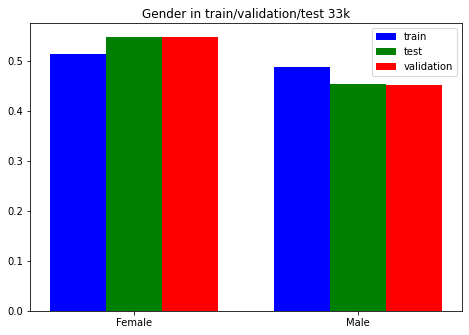

In [0]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, tr_g, color = 'b', width = 0.25, label = 'train')
ax.bar(X + 0.25, te_g, color = 'g', width = 0.25, label = 'test')
ax.bar(X + 0.50, val_g, color = 'r', width = 0.25, label = 'validation')
ax.set_xticks([0.25, 1.25])
ax.set_xticklabels( ('Female', 'Male') )
ax.legend()
ax.set_title("Gender in train/validation/test 33k")
plt.show()

<Figure size 432x288 with 0 Axes>

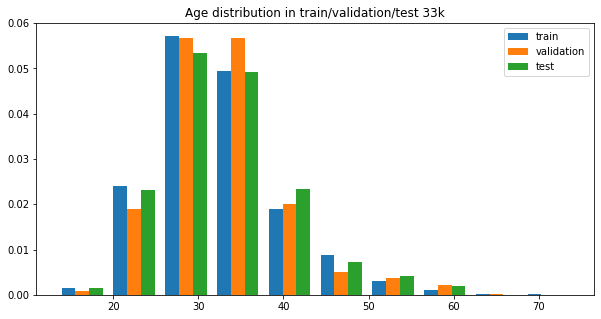

In [0]:
plt.clf()
plt.figure(figsize=(10,5))
plt.hist([train_all['age'].values, 
          val_all['age'].values, test_all['age'].values], 
         bins=10, label=['train', 'validation', 'test'], density = True)
plt.legend(loc='upper right')
plt.title('Age distribution in train/validation/test 33k')
plt.show()

AttributeError: ignored

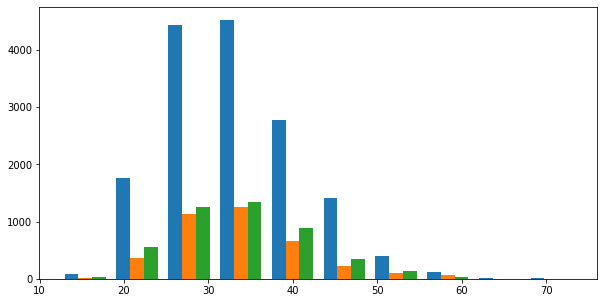

In [0]:
plt.figure(figsize=(10,5))
plt.hist([train_all['age'].values, val_all['age'].values, test_all['age'].values], bins=10, label=['train', 'validation', 'test'], normed = True)
plt.legend(loc='upper right')
plt.title('Age distribution in train/validation/test')
plt.show()

In [0]:
image_data_nona.fake_real_name.value_counts()

DeepFakeDetection      10038
real_images_youtube     7361
NeuralTextures          6515
real_images             3758
Face2Face               2536
Deepfakes               1602
FaceSwap                   2
Name: fake_real_name, dtype: int64

## Face2Face



In [0]:
df2 = df1[df1.fake_real_name == 'Face2Face']
df2.head()
df2['filename'][37485]


'/content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/Face2Face/c23/images/440_364.mp4_2.jpg'

In [0]:
#read faces dataset
faces_csv_path = '/content/drive/My Drive/FakeImageDetector/dataset/updated/faces_Face2Face_new.csv'
f2f_faces_dataset = pd.read_csv(faces_csv_path)
f2f_faces_dataset.shape

(9299, 4)

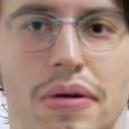

In [0]:
image_data.loc[index, 'face_path'].head()
filenam = image_data['face_path'][36628]
filemane2 = image_data['filename'][36628]

Image(filenam)
# /content/drive/My Drive/FakeImageDetector/data/manipulated_sequences/DeepFakeDetection/c23/faces/14_21__exit_phone_room__IRKML4J0_14.bmp.jpg 0

In [0]:
Image(filemane2)


##faceswap



In [0]:
image_data_r = pd.read_csv('/content/drive/My Drive/FakeImageDetector/test7_withfaces.csv')
df0 = image_data_r[image_data_r.fake_real_name == 'FaceSwap']
df0.shape

(6804, 15)

In [0]:
face_swap_faces = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset/faces_FaceSwap.csv')
face_swap_faces.head()
# face_swap_faces.filename

,index,filename,method,label
0,0,/content/drive/My Drive/FakeImageDetector/data...,FaceSwap,0
1,0,/content/drive/My Drive/FakeImageDetector/data...,FaceSwap,0
2,0,/content/drive/My Drive/FakeImageDetector/data...,FaceSwap,0
3,0,/content/drive/My Drive/FakeImageDetector/data...,FaceSwap,0
4,0,/content/drive/My Drive/FakeImageDetector/data...,FaceSwap,0


In [0]:
df2 = df1[df1.fake_real_name == 'FaceSwap']
df2.shape

(6802, 15)